# Spam Detection Model Using Multinomial Naive Bayes



## Project Description
The project focuses on building a **spam detection model** using **Multinomial Naive Bayes**. The dataset consists of labeled messages, with the labels being either 'spam' or 'ham' (non-spam). The goal is to accurately classify incoming text messages into these two categories using text-based feature extraction techniques and machine learning algorithms. The model helps automate the detection of unwanted messages in applications like email services or SMS filtering.



## Objective
- To build a spam detection model using a machine learning approach.
- To apply **Natural Language Processing (NLP)** techniques to extract meaningful features from text messages.
- To classify text messages into **spam** (unwanted messages) and **ham** (legitimate messages).
- To evaluate the performance of the model using appropriate classification metrics like accuracy, precision, recall, and F1-score.



## Column Information
1. **labels**: The classification label for each message, where 'spam' represents unwanted messages and 'ham' represents legitimate ones.
2. **messages**: The text message content to be classified into either 'spam' or 'ham'.



## Importance of the Spam Detection Model
Spam detection is crucial for:
- **Preventing fraud and scams**: By filtering out harmful messages, users are less exposed to phishing attempts and fraudulent offers.
- **Improving user experience**: Automatically filtering spam enhances the usability of email and messaging services by reducing the clutter in users' inboxes.
- **Saving resources**: Reducing the amount of spam helps organizations and individuals save bandwidth, storage, and processing time.



In [39]:
import pandas as pd 

## Loading the dataset

In [8]:
messages = pd.read_csv("C:\\Users\\Khan Mokhit\\Downloads\\SMSSpamCollection" , sep = '\t' , names = ['labels' , 'messages'])

In [9]:
messages

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### The number of messages in both categries 

**Spam** : The message is spam


**Ham** : The message is not spam 

In [38]:
messages.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

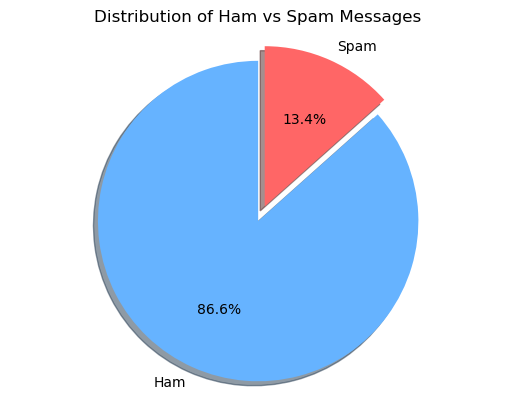

In [40]:
import matplotlib.pyplot as plt

# Data
labels = ['Ham', 'Spam']
sizes = [4825, 747]
colors = ['#66b3ff', '#ff6666']  # Optional color scheme for ham and spam
explode = (0.1, 0)  # "Explode" the 1st slice (ham) for emphasis

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')  

# Title
plt.title('Distribution of Ham vs Spam Messages')

# Show the pie chart
plt.show()


## Data Preprocessing

**regex** : with the help of the regex we are cleaning the dataset 

**Stopwords** : weith the help of stopwords which are present in the natural language tool kit we are removing the stopwords from the data 

**Stemming** : with the help of the stemming we are converting the words to the root form of that

In [10]:
import re 
import nltk
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

corpus = []

for i in range(0,len(messages)):
    
    message = re.sub(r'[^a-z,A-Z]',' ',messages['messages'][i])
    
    message = message.lower()
    
    message = message.split()
    
    message = [ps.stem(word) for word in message if word not in stopwords.words('english')]
    
    message = ' '.join(message)
    
    corpus.append(message)

[nltk_data] Downloading package stopwords to C:\Users\Khan
[nltk_data]     Mokhit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Corpus is the cleaned data 

In [1]:
#corpus

# Using Bag of Words

**BOW** : Using bag of words we are converting the corpus to numeric format so that we can train the model

In [14]:
# Creating the BOW

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)

X = cv.fit_transform(corpus).toarray()

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Using get dummies function we are creating the y variables in the numeric format 

In [45]:
y = pd.get_dummies(messages['labels'])

y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


#### We will use only one column for training the model

In [46]:
y = y.iloc[:,1].values

# Model training

In [24]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [25]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(x_train,y_train)

y_pred = spam_detect_model.predict(x_test)

### Accuracy

In [27]:
from sklearn.metrics import accuracy_score

print('Accuracy of the model = ' , accuracy_score(y_test,y_pred))

Accuracy of the model =  0.9856502242152466


# Using  TF-IDF

In [29]:
#TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features=2500)

X_tf = tf.fit_transform(corpus).toarray()

X_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
y_tf = pd.get_dummies(messages['labels'])

y_tf = y_tf.iloc[:,1].values

In [33]:
y_tf

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Model training 

In [34]:
from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split(X_tf , y_tf , test_size = 0.2 , random_state = 0)

In [35]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [36]:
spam_detect_model_tfidf =  mnb.fit(x_train , y_train)

y_pred = spam_detect_model_tfidf.predict(x_test)

### Accuracy

In [37]:
from sklearn.metrics import accuracy_score

print("Accuracy of the model is :",accuracy_score(y_test,y_pred))

Accuracy of the model is : 0.979372197309417


#### As we can see there is not much difference in the accuracy of both model it may change in other case 

## Conclusion
The **Multinomial Naive Bayes** algorithm proved effective for classifying text messages as spam or ham. By leveraging word frequency and patterns in the text, the model can accurately detect spam messages. The model's performance metrics indicate its reliability in real-world scenarios, providing a practical solution for email or SMS filtering.



## Future Work
- **Improve feature extraction**: Implement advanced NLP techniques such as **TF-IDF** or word embeddings (e.g., Word2Vec) to capture more nuanced text patterns.
- **Explore other models**: Evaluate the performance of other classifiers like **Logistic Regression**, **SVM**, or **Random Forest** to potentially improve accuracy.
- **Handle new and evolving spam patterns**: Integrate dynamic learning systems that adapt to evolving spam messages by updating the model periodically with new data.
- **Deployment**: Integrate the model into real-world messaging systems to automatically filter incoming messages and continuously improve through user feedback.
